In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
import sqlite3
import pandas as pd

pd.read_sql_query(
    "SELECT name, price, quantity, order_id, datetime "
    "FROM restaurant_orderitem "
    "LEFT JOIN restaurant_order "
    "ON restaurant_orderitem.order_id = restaurant_order.id "
    "LEFT JOIN restaurant_product "
    "ON restaurant_orderitem.product_id = restaurant_product.id", 
    sqlite3.connect(r"../db.sqlite3")
).to_csv("data.csv", index=False)

df = pd.read_csv("data.csv")
df

,name,price,quantity,order_id,datetime
0,Plain Papadum,0.80,2,1,2019-08-03 20:25:00
1,King Prawn Balti,12.95,1,1,2019-08-03 20:25:00
2,Garlic Naan,2.95,1,1,2019-08-03 20:25:00
3,Mushroom Rice,3.95,1,1,2019-08-03 20:25:00
4,Paneer Tikka Masala,8.95,1,1,2019-08-03 20:25:00
...,...,...,...,...,...
74813,House Red wine 75cl,17.95,2,3255,2016-05-18 18:53:00
74814,House Red wine 75cl,17.95,2,12905,2016-05-14 19:28:00
74815,House Red wine 75cl,17.95,2,3272,2016-05-10 13:18:00
74816,House white wine 75cl,17.95,1,11404,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

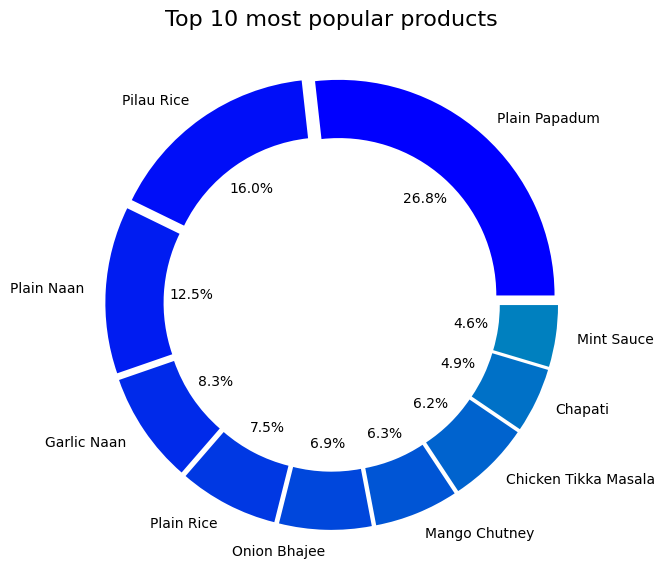

In [3]:
top_products = df.groupby(by="name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,7))
plt.pie(
    top_products,
    labels=top_products.index,
    autopct='%1.1f%%',
    labeldistance=1.1,
    colors=plt.get_cmap("winter")(np.linspace(0, 0.5, top_products.size)),
    wedgeprops=dict(width=0.27),
    explode=[0.05] * top_products.size,
)
plt.title("Top 10 most popular products", fontsize=16)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

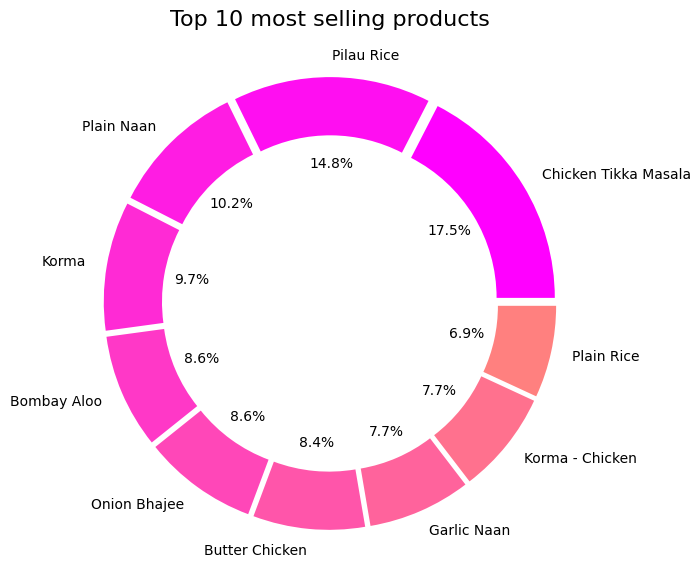

In [4]:
df["item price"] = df["quantity"] * df["price"]

top_products = df.groupby(by="name")["item price"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,7))
plt.pie(
    top_products,
    labels=top_products.index,
    autopct='%1.1f%%',
    labeldistance=1.1,
    colors=plt.get_cmap("spring")(np.linspace(0, 0.5, top_products.size)),
    wedgeprops=dict(width=0.27),
    explode=[0.05] * top_products.size,
)
plt.title("Top 10 most selling products", fontsize=16)
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

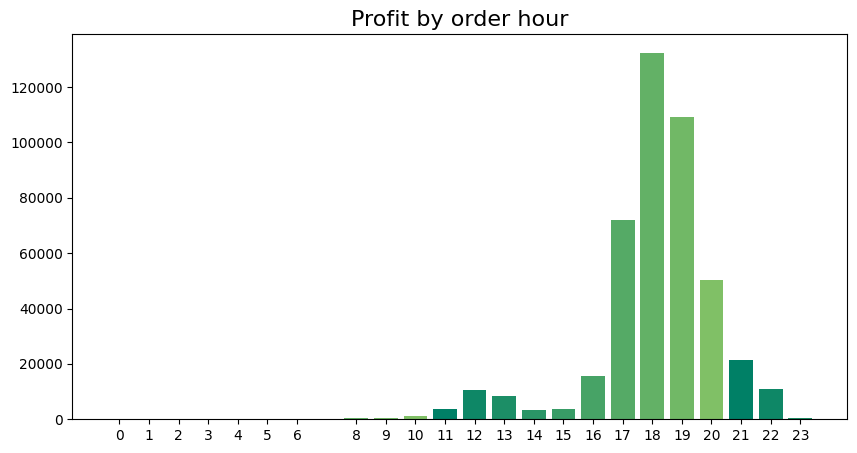

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour

top_hours = df.groupby(by="hour")["item price"].sum()

plt.figure(figsize=(10,5))
plt.bar(top_hours.index, top_hours, color=plt.get_cmap("summer")(np.linspace(0, 0.5, top_products.size)))
plt.title("Profit by order hour", fontsize=16)
plt.xticks(top_hours.index)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

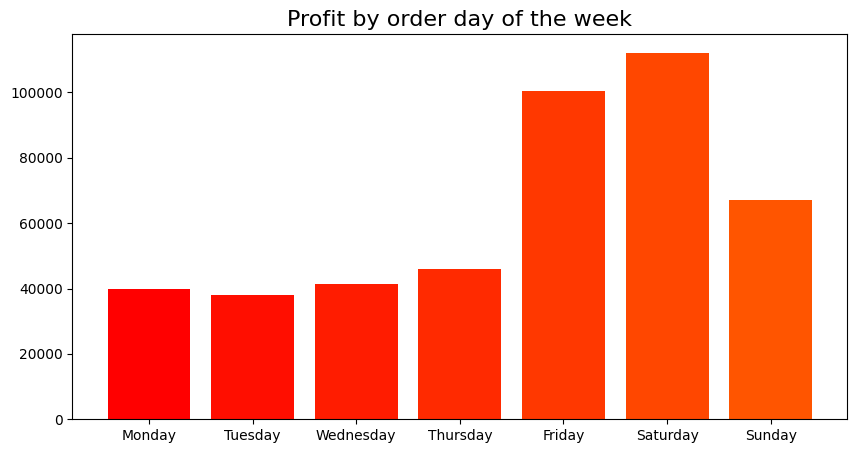

In [6]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["day week"] = df["datetime"].dt.day_name()

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
top_days = df.groupby(by="day week")["item price"].sum().reindex(days) 

plt.figure(figsize=(10,5))
plt.bar(top_days.index, top_days, color=plt.get_cmap("autumn")(np.linspace(0, 0.5, top_products.size)))
plt.title("Profit by order day of the week", fontsize=16)
plt.xticks(top_days.index)
plt.show()